In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
data1 = pd.read_csv('/content/fire_nrt_M-C61_386801.csv')
data2 = pd.read_csv('/content/fire_archive_M-C61_386800.csv')
data = pd.concat([data1, data2])

In [ ]:
data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,41.59523,-123.51530,324.94,1.04,1.02,2023-08-15,2142,Aqua,MODIS,64,6.1NRT,309.00,13.58,D,NaN
1,41.77549,-123.05905,330.33,1.51,1.21,2023-08-16,610,Terra,MODIS,54,6.1NRT,293.32,50.53,N,NaN
2,41.77725,-123.04015,322.92,1.52,1.22,2023-08-16,610,Terra,MODIS,0,6.1NRT,286.29,33.20,N,NaN
3,41.77882,-123.02316,323.88,1.52,1.22,2023-08-16,610,Terra,MODIS,32,6.1NRT,284.93,33.02,N,NaN
4,41.78028,-123.00724,351.98,1.53,1.22,2023-08-16,610,Terra,MODIS,100,6.1NRT,295.62,118.29,N,NaN


In [ ]:
data.drop(columns = 'type', inplace = True)

In [ ]:
data['instrument'].value_counts()

MODIS    769
Name: instrument, dtype: int64

In [ ]:
data.drop(columns = 'instrument', inplace = True)

In [ ]:
data['satellite'].value_counts()

Terra    415
Aqua     354
Name: satellite, dtype: int64

In [ ]:
data['satellite'] = data['satellite'].replace({'Aqua': 0, 'Terra': 1})

In [ ]:
data['daynight'] = data['daynight'].replace({'D': 0, 'N': 1})

In [ ]:
data['version'].value_counts()

6.1NRT    591
6.03      178
Name: version, dtype: int64

In [ ]:
data.drop(columns = 'version', inplace = True)

In [ ]:
data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight
0,41.59523,-123.51530,324.94,1.04,1.02,2023-08-15,2142,0,64,309.00,13.58,0
1,41.77549,-123.05905,330.33,1.51,1.21,2023-08-16,610,1,54,293.32,50.53,1
2,41.77725,-123.04015,322.92,1.52,1.22,2023-08-16,610,1,0,286.29,33.20,1
3,41.77882,-123.02316,323.88,1.52,1.22,2023-08-16,610,1,32,284.93,33.02,1
4,41.78028,-123.00724,351.98,1.53,1.22,2023-08-16,610,1,100,295.62,118.29,1


In [ ]:
data.describe()

,latitude,longitude,brightness,scan,track,acq_time,satellite,confidence,bright_t31,frp,daynight
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,41.638185,-123.325264,320.162003,1.553901,1.197737,1203.201560,0.539662,68.940182,293.425813,49.680793,0.637191
std,0.162078,0.228646,17.360685,0.762133,0.234037,669.628891,0.498749,25.803172,5.426336,165.619783,0.481123
min,41.282900,-123.665420,300.300000,1.000000,1.000000,453.000000,0.000000,0.000000,277.280000,3.800000,0.000000
25%,41.585880,-123.512060,308.400000,1.020000,1.010000,553.000000,0.000000,51.000000,289.700000,11.810000,0.000000
50%,41.655770,-123.409520,316.300000,1.250000,1.100000,1022.000000,1.000000,72.000000,292.400000,20.460000,1.000000
75%,41.762520,-123.098580,326.430000,1.640000,1.260000,1928.000000,1.000000,92.000000,296.330000,40.500000,1.000000
max,41.896500,-122.821400,457.730000,4.410000,1.930000,2225.000000,1.000000,100.000000,318.660000,2819.650000,1.000000


<ipython-input-15-eb5e7a21a886>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[columns[i]])
<ipython-input-15-eb5e7a21a886>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[columns[i]])
<ipython-input-15-eb5e7a21a886>:6: UserWarning: 

`distplot` is a deprecated function and will be 

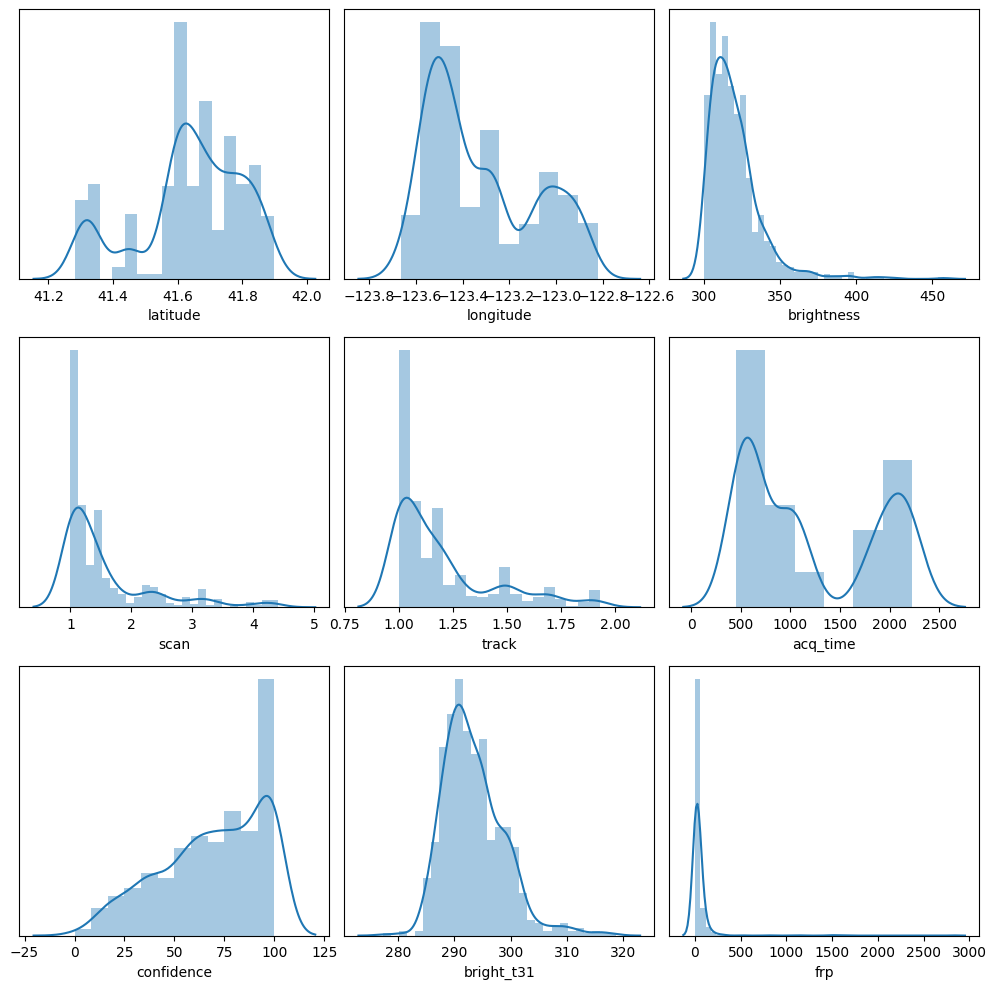

In [ ]:
columns = data.drop(columns = ['daynight', 'satellite', 'acq_date']).columns
plt.figure(figsize= (10,10))
for i in range (len(columns)):
  plt.subplot(3,3,i+1)
  plt.yticks([])
  sns.distplot(data[columns[i]])
plt.tight_layout()

In [ ]:
cols = ['scan', 'track', 'bright_t31']

for col in cols:
    data[col] = np.log(data[col])

In [ ]:
q1 = np.percentile(data['frp'], 25)
q3 = np.percentile(data['frp'], 75)
# print(q1, q3)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)

In [ ]:
print(upr_bound, lwr_bound)

83.535 -31.224999999999994


In [ ]:
data = data[data['frp'] < upr_bound]

In [ ]:
data.shape

(692, 12)

<ipython-input-21-dc6522d10238>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot= True)


<Axes: >

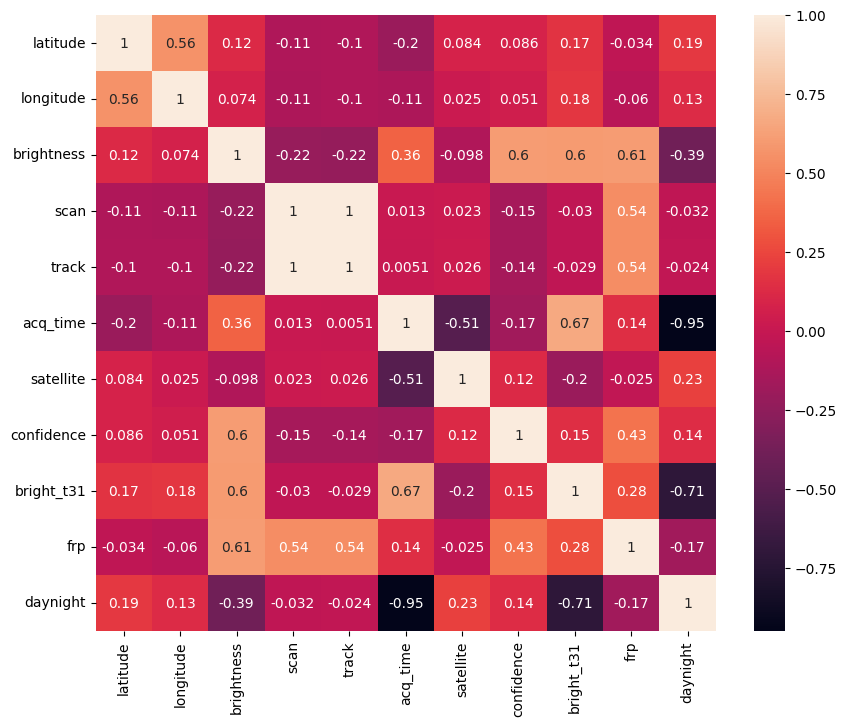

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot= True)

In [ ]:
data.drop(columns = 'acq_time', inplace = True)

In [ ]:
data['acq_date'] = pd.to_datetime(data['acq_date'])

In [ ]:
data['acq_day'] = data['acq_date'].dt.day

In [ ]:
data['acq_year'] = data['acq_date'].dt.year

In [ ]:
data.drop(columns = 'acq_date', inplace = True)

In [ ]:
data.head()

,latitude,longitude,brightness,scan,track,satellite,confidence,bright_t31,frp,daynight,acq_day,acq_year
0,41.59523,-123.51530,324.94,0.039221,0.019803,0,64,5.733341,13.58,0,15,2023
1,41.77549,-123.05905,330.33,0.412110,0.190620,1,54,5.681264,50.53,1,16,2023
2,41.77725,-123.04015,322.92,0.418710,0.198851,1,0,5.657005,33.20,1,16,2023
3,41.77882,-123.02316,323.88,0.418710,0.198851,1,32,5.652244,33.02,1,16,2023
5,41.78182,-122.99049,323.26,0.425268,0.198851,1,71,5.686161,35.07,1,16,2023


In [ ]:
X = data.drop(columns = 'brightness')
y = data['brightness']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
model = SGDRegressor()

In [ ]:
model.fit(X_train, y_train)

SGDRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

0.8984892076308659

In [ ]:
Rf = RandomForestRegressor()

In [ ]:
Rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = Rf.predict(X_test)

In [ ]:
y_train_pred = Rf.predict(X_train)
r2_score(y_train, y_train_pred)

0.9957187635802943

In [ ]:
r2_score(y_test, y_pred)

0.9602152836287727

**plotting on map**

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_mapbox(data, lat="latitude", lon="longitude", hover_data=["brightness"],
                        color_discrete_sequence=["red"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
fig.write_html("/content/file.html")